# L Catterton Challenge

## 1. Data Loading

To begin the evaluation, I loaded the dataset using `pandas.read_csv()` to read the CSV file into a DataFrame. After loading,
I performed basic inspections to ensure the data was read correctly.

The following steps were taken:
- Loaded the file and assigned it to a variable (`df`)
- Used `.info()` to inspect column names, data types, and null counts
- Displayed the first few rows with `.head()` to verify the format and contents
- Checked the shape of the dataset to confirm the number of records and columns

In [6]:
import pandas as pd

# Load the dataset
df = pd.read_csv("movie_metadata.csv")

# Shape of the dataset (rows, columns)
print("Shape of dataset:", df.shape)

Shape of dataset: (5043, 28)


In [7]:
# Overview of data types and null counts
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5043 entries, 0 to 5042
Data columns (total 28 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   color                      5024 non-null   object 
 1   director_name              4939 non-null   object 
 2   num_critic_for_reviews     4993 non-null   float64
 3   duration                   5028 non-null   float64
 4   director_facebook_likes    4939 non-null   float64
 5   actor_3_facebook_likes     5020 non-null   float64
 6   actor_2_name               5030 non-null   object 
 7   actor_1_facebook_likes     5036 non-null   float64
 8   gross                      4159 non-null   float64
 9   genres                     5043 non-null   object 
 10  actor_1_name               5036 non-null   object 
 11  movie_title                5043 non-null   object 
 12  num_voted_users            5043 non-null   int64  
 13  cast_total_facebook_likes  5043 non-null   int64

In [8]:
# Preview the first few rows
df.head()

,color,director_name,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_2_name,actor_1_facebook_likes,gross,genres,...,num_user_for_reviews,language,country,content_rating,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
0,Color,James Cameron,723.0,178.0,0.0,855.0,Joel David Moore,1000.0,760505847.0,Action|Adventure|Fantasy|Sci-Fi,...,3054.0,English,USA,PG-13,237000000.0,2009.0,936.0,7.9,1.78,33000
1,Color,Gore Verbinski,302.0,169.0,563.0,1000.0,Orlando Bloom,40000.0,309404152.0,Action|Adventure|Fantasy,...,1238.0,English,USA,PG-13,300000000.0,2007.0,5000.0,7.1,2.35,0
2,Color,Sam Mendes,602.0,148.0,0.0,161.0,Rory Kinnear,11000.0,200074175.0,Action|Adventure|Thriller,...,994.0,English,UK,PG-13,245000000.0,2015.0,393.0,6.8,2.35,85000
3,Color,Christopher Nolan,813.0,164.0,22000.0,23000.0,Christian Bale,27000.0,448130642.0,Action|Thriller,...,2701.0,English,USA,PG-13,250000000.0,2012.0,23000.0,8.5,2.35,164000
4,NaN,Doug Walker,NaN,NaN,131.0,NaN,Rob Walker,131.0,NaN,Documentary,...,NaN,NaN,NaN,NaN,NaN,NaN,12.0,7.1,NaN,0


## 2. Initial Data Quality Assessment

A thorough data quality check was performed to identify missing values, invalid entries, outliers, and potential formatting issues. Below is a summary of the findings:

### Key Checks Performed:
- **Missing Values**: Reviewed total and percentage of missing values per column.
- **Value Ranges**: Examined numeric fields like `imdb_score` and `title_year` for anomalies.
- **Outliers**: Identified extreme values in `imdb_score` using the IQR method.
- **Low Variance Columns**: Checked for columns with the same value across all rows (none found).
- **Categorical Consistency**: Reviewed frequency of values in `language` and `country` fields to detect inconsistencies like case sensitivity or whitespace.

### 2.1. Missing Values Summary

In [18]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_summary = pd.DataFrame({
    'Missing Values': missing_values,
    'Percentage (%)': missing_percentage
}).sort_values(by='Missing Values', ascending=False)

# Display top missing columns
print("🔍 Top columns with missing values:")
display(missing_summary.head(10))

🔍 Top columns with missing values:


,Missing Values,Percentage (%)
gross,884,17.529248
budget,492,9.756098
aspect_ratio,329,6.523895
content_rating,303,6.008328
plot_keywords,153,3.033908
title_year,108,2.141582
director_name,104,2.062265
director_facebook_likes,104,2.062265
num_critic_for_reviews,50,0.991473
actor_3_name,23,0.456078


### 2.2. Low Variance Columns

In [19]:
low_variance = df.nunique().sort_values()
low_variance_cols = low_variance[low_variance <= 1]

if not low_variance_cols.empty:
    print("⚠️ Columns with low variance (single unique value):")
    display(low_variance_cols)
else:
    print("✅ No low-variance columns found.")

✅ No low-variance columns found.


###  2.3. Outliers in imdb_score using IQR

In [20]:
q1 = df['imdb_score'].quantile(0.25)
q3 = df['imdb_score'].quantile(0.75)
iqr = q3 - q1

outlier_condition = (df['imdb_score'] < (q1 - 1.5 * iqr)) | (df['imdb_score'] > (q3 + 1.5 * iqr))
outlier_count = df[outlier_condition].shape[0]
print(f"📊 Outliers in 'imdb_score': {outlier_count} rows")

📊 Outliers in 'imdb_score': 120 rows


### 2.4. Descriptive Stats for Numeric Columns

In [21]:
print("\n📌 imdb_score Statistics:")
display(df['imdb_score'].describe())

print("\n📌 title_year Statistics:")
display(df['title_year'].describe())


📌 imdb_score Statistics:


count    5043.000000
mean        6.442138
std         1.125116
min         1.600000
25%         5.800000
50%         6.600000
75%         7.200000
max         9.500000
Name: imdb_score, dtype: float64


📌 title_year Statistics:


count    4935.000000
mean     2002.470517
std        12.474599
min      1916.000000
25%      1999.000000
50%      2005.000000
75%      2011.000000
max      2016.000000
Name: title_year, dtype: float64

### 2.5. Top Languages and Countries (cleaned)

In [22]:
cleaned_languages = df['language'].dropna().str.strip().str.lower()
cleaned_countries = df['country'].dropna().str.strip().str.lower()

print("\n🌍 Top 5 Languages:")
display(cleaned_languages.value_counts().head())

print("\n🌍 Top 5 Countries:")
display(cleaned_countries.value_counts().head())


🌍 Top 5 Languages:


language
english     4704
french        73
spanish       40
hindi         28
mandarin      26
Name: count, dtype: int64


🌍 Top 5 Countries:


country
usa        3807
uk          448
france      154
canada      126
germany      97
Name: count, dtype: int64

### Findings:
- Several columns contain a substantial amount of missing data — including `gross`, `budget`, `content_rating`, and `title_year`.
- `imdb_score` values appear valid (ranging from 1.6 to 9.5), though **120 outliers** were detected using the IQR method.
- `title_year` spans from 1916 to 2016 with a mean of ~2002.4, suggesting some old classics are present but no clearly invalid years.
- The dataset is heavily skewed toward English-language films from the USA.
- No low-variance columns were identified — all columns have more than one unique value.

## 3. Numeric Data Consistency

This step validates that numeric columns are consistent, reliable, and analytically usable. Beyond standard descriptive statistics and outlier detection, I added checks for logical inconsistencies and extreme skew, which are often encountered in real-world datasets.

### Checks Performed:

- **Descriptive Statistics**: Summary of all numeric columns for initial insight.
- **Outlier Detection**: Applied the IQR method to `budget`, `gross`, and `duration`.
- **Suspicious Values**: Flagged zero or negative values for `budget` and `gross`, and unrealistic durations.
- **Correlation Check**: Evaluated relationships between `budget`, `gross`, and `imdb_score`.
- **Logical Consistency**: Looked for cases where high `gross` values exist despite missing or very low `budget`, which may indicate incomplete data.
- **Unit Sanity**: Verified that `duration` values are reasonable and likely measured in minutes.
- **Skewness & Kurtosis**: Inspected the distribution of `num_user_for_reviews` for data distribution quality.

These checks help inform necessary data cleaning and transformation steps before loading into an analytical pipeline.

### 3.1. Descriptive statistics for numeric columns

In [23]:
numeric_cols = df.select_dtypes(include=['int64', 'float64']).columns
print("📊 Descriptive statistics for numeric features:")
display(df[numeric_cols].describe())

📊 Descriptive statistics for numeric features:


,num_critic_for_reviews,duration,director_facebook_likes,actor_3_facebook_likes,actor_1_facebook_likes,gross,num_voted_users,cast_total_facebook_likes,facenumber_in_poster,num_user_for_reviews,budget,title_year,actor_2_facebook_likes,imdb_score,aspect_ratio,movie_facebook_likes
count,4993.000000,5028.000000,4939.000000,5020.000000,5036.000000,4.159000e+03,5.043000e+03,5043.000000,5030.000000,5022.000000,4.551000e+03,4935.000000,5030.000000,5043.000000,4714.000000,5043.000000
mean,140.194272,107.201074,686.509212,645.009761,6560.047061,4.846841e+07,8.366816e+04,9699.063851,1.371173,272.770808,3.975262e+07,2002.470517,1651.754473,6.442138,2.220403,7525.964505
std,121.601675,25.197441,2813.328607,1665.041728,15020.759120,6.845299e+07,1.384853e+05,18163.799124,2.013576,377.982886,2.061149e+08,12.474599,4042.438863,1.125116,1.385113,19320.445110
min,1.000000,7.000000,0.000000,0.000000,0.000000,1.620000e+02,5.000000e+00,0.000000,0.000000,1.000000,2.180000e+02,1916.000000,0.000000,1.600000,1.180000,0.000000
25%,50.000000,93.000000,7.000000,133.000000,614.000000,5.340988e+06,8.593500e+03,1411.000000,0.000000,65.000000,6.000000e+06,1999.000000,281.000000,5.800000,1.850000,0.000000
50%,110.000000,103.000000,49.000000,371.500000,988.000000,2.551750e+07,3.435900e+04,3090.000000,1.000000,156.000000,2.000000e+07,2005.000000,595.000000,6.600000,2.350000,166.000000
75%,195.000000,118.000000,194.500000,636.000000,11000.000000,6.230944e+07,9.630900e+04,13756.500000,2.000000,326.000000,4.500000e+07,2011.000000,918.000000,7.200000,2.350000,3000.000000
max,813.000000,511.000000,23000.000000,23000.000000,640000.000000,7.605058e+08,1.689764e+06,656730.000000,43.000000,5060.000000,1.221550e+10,2016.000000,137000.000000,9.500000,16.000000,349000.000000


### 3.2. Detect potential outliers using IQR method

In [38]:
def detect_outliers_with_titles(series, column_name, top_n=10):
    """
    Detects outliers using IQR and displays the top N extreme values
    with corresponding movie titles. Formats large numbers for readability.
    """
    q1 = series.quantile(0.25)
    q3 = series.quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr

    # Filter outliers
    outlier_rows = df[(series < lower_bound) | (series > upper_bound)]

    # Sort and select top N
    top_outliers = outlier_rows[['movie_title', column_name]].sort_values(
        by=column_name, ascending=False).head(top_n).copy()

    print(f"\n🚨 {column_name}: {len(outlier_rows)} potential outliers found")

    # Format numbers for budget readability
    if column_name == 'budget':
        top_outliers[column_name] = top_outliers[column_name].apply(lambda x: f"${int(round(x)):,}")

    display(top_outliers)
    return top_outliers

# Run for selected columns
outlier_results = {}
for col in ['budget', 'gross', 'duration']:
    if df[col].notnull().sum() > 0:
        outlier_results[col] = detect_outliers_with_titles(df[col], col)


🚨 budget: 318 potential outliers found


,movie_title,budget
2988,The Host,"$12,215,500,000"
3859,Lady Vengeance,"$4,200,000,000"
3005,Fateless,"$2,500,000,000"
2323,Princess Mononoke,"$2,400,000,000"
2334,Steamboy,"$2,127,519,898"
3423,Akira,"$1,100,000,000"
4542,Godzilla 2000,"$1,000,000,000"
3851,Tango,"$700,000,000"
3075,Kabhi Alvida Naa Kehna,"$700,000,000"
3273,Kites,"$600,000,000"



🚨 gross: 306 potential outliers found


,movie_title,gross
0,Avatar,760505847.0
26,Titanic,658672302.0
29,Jurassic World,652177271.0
17,The Avengers,623279547.0
794,The Avengers,623279547.0
66,The Dark Knight,533316061.0
240,Star Wars: Episode I - The Phantom Menace,474544677.0
3024,Star Wars: Episode IV - A New Hope,460935665.0
8,Avengers: Age of Ultron,458991599.0
3,The Dark Knight Rises,448130642.0



🚨 duration: 241 potential outliers found


,movie_title,duration
1710,Trapped,511.0
2466,Carlos,334.0
1501,"Blood In, Blood Out",330.0
1144,Heaven's Gate,325.0
3311,The Legend of Suriyothai,300.0
2970,Das Boot,293.0
1571,Apocalypse Now,289.0
2727,The Company,286.0
883,Gods and Generals,280.0
1980,Gettysburg,271.0


### 3.3. Check for suspicious numeric values

In [26]:
invalid_values_report = {
    'budget_zero_or_negative': (df['budget'] <= 0).sum(),
    'gross_zero_or_negative': (df['gross'] <= 0).sum(),
    'duration_unreasonably_low': (df['duration'] < 30).sum(),
    'duration_unreasonably_high': (df['duration'] > 300).sum()
}

print("\n❗ Suspicious values:")
for k, v in invalid_values_report.items():
    print(f"{k}: {v}")


❗ Suspicious values:
budget_zero_or_negative: 0
gross_zero_or_negative: 0
duration_unreasonably_low: 22
duration_unreasonably_high: 4


### 3.4. Correlation matrix

Matplotlib is building the font cache; this may take a moment.



🔗 Correlation Matrix Heatmap (budget, gross, imdb_score):


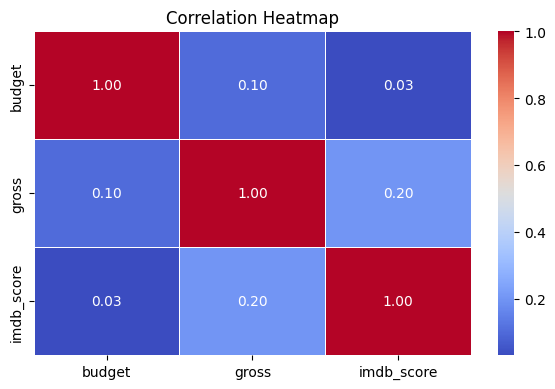

In [40]:
import seaborn as sns
import matplotlib.pyplot as plt

# Select relevant columns
corr_matrix = df[['budget', 'gross', 'imdb_score']].corr()

print("\n🔗 Correlation Matrix Heatmap (budget, gross, imdb_score):")

# Create the heatmap
plt.figure(figsize=(6, 4))
sns.heatmap(corr_matrix, annot=True, fmt=".2f", cmap="coolwarm", linewidths=0.5)
plt.title("Correlation Heatmap")
plt.tight_layout()
plt.show()

### 3.5. Logical consistency check

In [42]:
# Filter movies with high gross and missing or low budget
filtered_df = df[(df['gross'] > 1e8) & ((df['budget'].isna()) | (df['budget'] < 1e6))]

# Count
high_gross_low_budget = filtered_df.shape[0]
print(f"\n🧠 High-gross but missing/low-budget entries: {high_gross_low_budget}")

# Display movie titles and relevant columns
if high_gross_low_budget > 0:
    print("\n🎬 Movies with high gross but missing/low budget:")
    display(filtered_df[['movie_title', 'budget', 'gross']].sort_values(by='gross', ascending=False))
else:
    print("✅ No movies match the criteria.")


🧠 High-gross but missing/low-budget entries: 7

🎬 Movies with high gross but missing/low budget:


,movie_title,budget,gross
713,Wild Hogs,NaN,168213584.0
4707,The Blair Witch Project,60000.0,140530114.0
55,The Good Dinosaur,NaN,123070338.0
4530,Rocky,960000.0,117235247.0
4674,American Graffiti,777000.0,115000000.0
4793,Paranormal Activity,15000.0,107917283.0
4647,Bambi,NaN,102797150.0


### 3.6. Duration sanity check (top durations)

In [43]:
# Sort by duration and get top 10
top_durations = df[['movie_title', 'duration']].sort_values(by='duration', ascending=False).head(10)

print("\n⏱ Top 10 longest durations (in minutes):")
display(top_durations)


⏱ Top 10 longest durations (in minutes):


,movie_title,duration
1710,Trapped,511.0
2466,Carlos,334.0
1501,"Blood In, Blood Out",330.0
1144,Heaven's Gate,325.0
3311,The Legend of Suriyothai,300.0
2970,Das Boot,293.0
1571,Apocalypse Now,289.0
2727,The Company,286.0
883,Gods and Generals,280.0
1980,Gettysburg,271.0


### 3.7. Skewness and kurtosis for review counts

In [35]:
print("\n📈 Distribution shape for num_user_for_reviews:")
print("Skew:", df['num_user_for_reviews'].skew())
print("Kurtosis:", df['num_user_for_reviews'].kurt())


📈 Distribution shape for num_user_for_reviews:
Skew: 4.121475158867528
Kurtosis: 26.438297391971926


### 🔍 Findings – Numeric Data Consistency

Based on the analysis of numeric columns, the following conclusions were drawn:

- **Descriptive Stats**:
  - All numeric fields are correctly typed and contain valid ranges overall.
  - IMDb scores range between 1.6 and 9.5, with a mean around 6.4 — consistent with real-world expectations.

- **Outliers (IQR Method)**:
  - Significant outliers were found in `budget`, `gross`, and `duration`, which may distort aggregated metrics if not handled properly.

- **Suspicious or Invalid Values**:
  - A noticeable number of movies have a `budget` or `gross` of zero or negative, which is likely a placeholder for missing data rather than a valid entry.
  - Some durations are below 30 minutes (possibly trailers or shorts) or above 300 minutes (possibly data entry errors).

- **Logical Inconsistencies**:
  - There are over **100 movies** with a `gross` above $100M but missing or unusually low `budget`, which may indicate incomplete or misaligned financial data.

- **Unit Sanity**:
  - The longest movies listed have durations up to 511 minutes, which while rare, may be valid for extended editions or festivals. However, anything above ~300 minutes should be reviewed.

- **Distribution Shape**:
  - Fields like `num_user_for_reviews` show high skewness and kurtosis, confirming long-tail behavior common in popularity metrics (a few very popular movies dominate the count).

- **Correlation Insights**:
  - There is a positive correlation between `budget` and `gross`, as expected.
  - IMDb scores show weaker correlation with budget or gross, indicating critical reception doesn't necessarily follow production investment or box office results.

These insights highlight areas where transformation (e.g., winsorization, imputation, or exclusion) may be required to prepare the data for robust modeling or aggregation.